# Feature Selection

## Author - Rodolfo Lerma

# Problem

Apply three techniques for filter selection: Filter methods, Wrapper methods, Embedded methods and determine if there is one method for this particular case that does better.

# Abstract:

You are working for a data science consulting company. Your company is approached by a client requesting that you analyze crime data across the United States. At first glance, you notice that the data has 128 attributes and cannot be examined manually. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR. You are tasked to identify which are the most important features or attributes that contribute to crime. 

The analysis is is divided the following way:

### Data exploration.
- **Adding column names to the data**
- **Explore and remove missing data**

### Feature Selection.
- **1st Method: Filter Method**
    - Correlation
    - Mutual Information
- **2nd Method: Wrapper Methods**
    - Backward Selection
- **3rd Method: Embedded Methods**
    - LASSO

### Evaluation of the Features.
- **Train & Test Model**
- **Evaluate Model Performance**
    - Model using using Filter Methods
    - Model using using Wrapper Methods
    - Model using using Embedded Methods
- **Comparison**

### Summary/Conclusions.

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Data exploration

In [2]:
#Load File
filename = 'communities.data'
filename2 = 'Columns.csv'
df = pd.read_csv(filename,header=None)
names = pd.read_csv(filename2,header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [4]:
names

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop


## Adding column names to the data

In [5]:
#Adding column names to the DataFrame
rows = names.to_numpy()
rows2 = rows.tolist()
df.columns = rows2

In [6]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [7]:
df = df.replace({'?': np.nan})

## Explore and remove missing data

In [8]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [9]:
df.shape

(1994, 128)

It is possible to see that there are a lot of missing values. If we decided to removed the missing values the data frame would srink from 1994 to around 124. Therefore this is going to be explore further to understand other possibilities.

In [10]:
missing_values = []
my_list = df.columns.values.tolist()
y = df.shape
for i in my_list:
    x = df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

In [11]:
a

[(('LemasSwornFT',), 1675),
 (('LemasSwFTPerPop',), 1675),
 (('LemasSwFTFieldOps',), 1675),
 (('LemasSwFTFieldPerPop',), 1675),
 (('LemasTotalReq',), 1675),
 (('LemasTotReqPerPop',), 1675),
 (('PolicReqPerOffic',), 1675),
 (('PolicPerPop',), 1675),
 (('RacialMatchCommPol',), 1675),
 (('PctPolicWhite',), 1675),
 (('PctPolicBlack',), 1675),
 (('PctPolicHisp',), 1675),
 (('PctPolicAsian',), 1675),
 (('PctPolicMinor',), 1675),
 (('OfficAssgnDrugUnits',), 1675),
 (('NumKindsDrugsSeiz',), 1675),
 (('PolicAveOTWorked',), 1675),
 (('PolicCars',), 1675),
 (('PolicOperBudg',), 1675),
 (('LemasPctPolicOnPatr',), 1675),
 (('LemasGangUnitDeploy',), 1675),
 (('PolicBudgPerPop',), 1675),
 (('community',), 1177),
 (('county',), 1174),
 (('OtherPerCap',), 1),
 (('state',), 0),
 (('communityname',), 0),
 (('fold',), 0),
 (('population',), 0),
 (('householdsize',), 0),
 (('racepctblack',), 0),
 (('racePctWhite',), 0),
 (('racePctAsian',), 0),
 (('racePctHisp',), 0),
 (('agePct12t21',), 0),
 (('agePct12t2

The following dictionary contains the name of the column and the number of missing values. The dictionary is ordered by Value from Highest to Lowest.
Next step would be to make a list of the features with mostly missing values.

In [12]:
missing_columns_names = []
for key, value in columns_missing.items():
    if value > 500:
        x = key
        missing_columns_names.append(x)

Those columns would be eliminated from the data set, since most of the values are missing.

In [13]:
df = df.drop(missing_columns_names, axis = 1)

In [14]:
df = df.dropna()

24 columns were removed from the data set. And after that just 1 row was removed as contained a missing value.

In [15]:
df.shape

(1993, 104)

At this point we have a data set with 104 features and 1993 values (rows) and no missing values.

In [16]:
df.dtypes

state                      int64
communityname             object
fold                       int64
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap               object
HispPerCap               float64
          

In [17]:
categorical = []
numerical = []
updated_columns = df.columns.values.tolist()
y = df.shape
for i in updated_columns:
    x = df[i].dtypes
    if x == object:
        categorical.append(i)
    else:
        numerical.append(i)

Using the code above the list of variables was divided into categorical and numerical.

In [18]:
d = df.describe()
d

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,5.496237,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,...,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983
std,16.401661,2.872650,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,...,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

## 1st Method: Filter Method

### Correlation

In [19]:
correlations_df = df[numerical].corr()
df_correlations = correlations_df['ViolentCrimesPerPop']
df_correlations['Corr_Abs'] = abs(correlations_df['ViolentCrimesPerPop'])

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#list: High correlation and low correlation
df_correlations.reset_index(inplace=True)
high_correlated_features = []
low_correlated_features = []
for i in range(len(df_correlations['Corr_Abs'])):
    p = df_correlations.iloc[i,2]
    if p >= 0.5:
        l = df_correlations.iloc[i,0]
        high_correlated_features.append(l)
    else:
        r = df_correlations.iloc[i,0]
        low_correlated_features.append(r)

After this 2 lists of Features is generated, one with columns with correlation values higher than 0.5 and another one with correlation values lower than 0.5. For this analysis the list of variables with correlation higher than 0.5 is the one that will be used for the ML model.

### Mutual Information

In [22]:
from sklearn.metrics import mutual_info_score
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi
mutual_values = []
df_numeric = df[numerical]
for i in range(len(df_numeric.iloc[1])):
    X = df_numeric.iloc[:,i].tolist()
    Y = df_numeric.iloc[:,101].tolist()
    mi = calc_MI(X, Y, 20)
    mutual_values.append(mi)
my_list_mutual = df_numeric.columns.values.tolist()    
mutual_info_dict = dict(zip(my_list_mutual, mutual_values))
mutual_info_dict_sorted = sorted(mutual_info_dict.items(), key=lambda x: x[1], reverse = True)
df_correlations['Mutual_info'] = mutual_values

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [55]:
df_correlations.tail()

,level_0,ViolentCrimesPerPop,Corr_Abs,Mutual_info
97,LandArea,0.196799,0.196799,0.085195
98,PopDens,0.281402,0.281402,0.151604
99,PctUsePubTrans,0.153830,0.153830,0.121957
100,LemasPctOfficDrugUn,0.348634,0.348634,0.162580
101,ViolentCrimesPerPop,1.000000,1.000000,2.500606


In [24]:
#List: High mi and low mi
high_mi_features = []
low_mi_features = []
for i in range(len(df_correlations['Mutual_info'])):
    w = df_correlations.iloc[i,3]
    if w >= 0.2:
        q = df_correlations.iloc[i,0]
        high_mi_features.append(q)
    else:
        k = df_correlations.iloc[i,0]
        low_mi_features.append(k)

In [25]:
#Remove the target variable
high_correlated_features.remove('ViolentCrimesPerPop')
high_mi_features.remove('ViolentCrimesPerPop')

In [26]:
elements_in_both = sum(x in high_correlated_features for x in high_mi_features)
elements_in_both

15

In [27]:
high_correlated_features

['racepctblack',
 'racePctWhite',
 'pctWInvInc',
 'pctWPubAsst',
 'PctPopUnderPov',
 'PctUnemployed',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctIlleg',
 'PctPersOwnOccup']

In [28]:
high_correlated_features

['racepctblack',
 'racePctWhite',
 'pctWInvInc',
 'pctWPubAsst',
 'PctPopUnderPov',
 'PctUnemployed',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctIlleg',
 'PctPersOwnOccup']

From here it is possible to see that the values with high correlation are also values with high mi value, therefore those 15 features are going to be selected.

## 2nd Method: Wrapper Methods

### Backward Selection

In [29]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

In [30]:
estimator = LinearRegression()

In [31]:
selector = RFE(estimator, 20, step=1)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [32]:
df_numeric_copy = df_numeric.copy()

In [33]:
crimes = df_numeric.iloc[:,101] #This is the selection of the Target Variables
df_updated = df_numeric_copy.drop('ViolentCrimesPerPop', axis='columns')

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [34]:
lol = df_updated.values.tolist()
selector = selector.fit(lol, crimes)

In [35]:
print(selector.support_)
print(selector.ranking_)

[False False  True False  True False False False False False False False
  True False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False  True False  True  True False False  True False False
 False False False False False False False False False False False  True
 False False False False False  True False  True  True  True False False
  True False  True False False False False False  True  True False  True
 False False  True False False False False False False False False False
 False False False False False]
[81 78  1 82  1 59 73 32 29 16 37 55  1 38  9  8 36 19 26 80 24 10  1  1
 60 51 66 35 21 22 27 39 52 75 11 42 65 41 23  1 17  1  1 43 72  1 54 79
 30 15 14  4  5 48 64 49 50 47  2  1 18 63  7 58 12  1 31  1  1  1 28 57
  1 40  1 34 33 67 77 71  1  1 68  1 56 25  1 46 44 20 13  3  6 76 70 53
 69 62 74 45 61]


In [36]:
boolean_values = selector.support_
ranking_values = selector.ranking_
wrapper_columns = df_updated.columns.values.tolist()

In [37]:
#Selection of the features with ranking 1
selected_features = []
unselected_features = []
for i in range(len(wrapper_columns)):
    w = boolean_values[i]
    if w == True:
        b = wrapper_columns[i]
        selected_features.append(b)
    else:
        v = wrapper_columns[i]
        unselected_features.append(v)

In [38]:
selected_features

[('population',),
 ('racepctblack',),
 ('numbUrban',),
 ('perCapInc',),
 ('whitePerCap',),
 ('MalePctDivorce',),
 ('FemalePctDiv',),
 ('TotalPctDiv',),
 ('PctKids2Par',),
 ('PctRecImmig8',),
 ('PersPerOccupHous',),
 ('PersPerRentOccHous',),
 ('PctPersOwnOccup',),
 ('PctPersDenseHous',),
 ('HousVacant',),
 ('PctHousOwnOcc',),
 ('OwnOccLowQuart',),
 ('OwnOccMedVal',),
 ('RentLowQ',),
 ('MedRent',)]

## 3rd Method: Embedded Methods

### LASSO

In [39]:
# LASSO
from sklearn import linear_model
alpha = 0.001 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)

In [40]:
clf.fit(lol, crimes)
print(clf.coef_)
print(clf.intercept_)
lasso_coef = clf.coef_
# Increasing alpha can compress the L2 norm of the coefficients to 0 (but not selecting variables)
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

[-0.00126156 -0.00200431  0.         -0.          0.12425299 -0.06720111
 -0.          0.         -0.         -0.         -0.00050421  0.
  0.          0.03323372 -0.         -0.00469534  0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.11997121 -0.          0.
  0.          0.         -0.         -0.22678381 -0.01910298 -0.
 -0.         -0.05209487  0.          0.18840765  0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.          0.          0.          0.
 -0.          0.         -0.          0.12578858  0.         -0.
  0.10496632 -0.04695351 -0.          0.04083845 -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.          0.0

In [41]:
#Selection of the non zero coefficients from the LASSO regression
lasso_features = []
non_lasso_features = []
for i in range(len(wrapper_columns)):
    w = lasso_coef[i]
    if w != 0:
        u = wrapper_columns[i]
        lasso_features.append(u)
    else:
        t = wrapper_columns[i]
        non_lasso_features.append(t)

In [42]:
lasso_features

[('state',),
 ('fold',),
 ('racepctblack',),
 ('racePctWhite',),
 ('agePct16t24',),
 ('pctUrban',),
 ('pctWWage',),
 ('MalePctDivorce',),
 ('PctKids2Par',),
 ('PctYoungKids2Par',),
 ('PctWorkMom',),
 ('PctIlleg',),
 ('PctPersDenseHous',),
 ('HousVacant',),
 ('PctHousOccup',),
 ('PctVacantBoarded',),
 ('NumStreet',),
 ('PctSameCity85',),
 ('LemasPctOfficDrugUn',)]

# Evaluation of the Features

## Train & Test Model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [44]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors

#List for Classifiers and Names
header = ["K_Nearest_Neighbors"]
V = [knn]

## Evaluate Model Performance

In [45]:
#Function to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print("Classifier: ", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    print (" ")
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.values.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        allvalues = [AR, ER, P, R, F1]
    return allvalues

For simplicity purposes and to be able to do a quick evaluation of the feature selection, the target variable is going to be transform to a binomial variable. Based on the nature of the data and the target variable using Regression would be a better way, but in this case since we want to compare which feature selection does better a Classification analysis should suffice. 

In [46]:
tr = df_numeric.iloc[:,101].tolist()
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b < 0.5:
        n = 0
    else:
        n = 1
    binomial.append(n)
df_numeric['target'] = binomial

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### Model using using Filter Methods

In [47]:
#Split the data
label = df_numeric['target']
variables = df_numeric[high_correlated_features]
X_train, X_test, y_train, y_test = train_test_split(variables, label, test_size=0.30, random_state=42)

In [48]:
#Running and obtaining performance values from the Models listed above
filters = classifier_performance(V, header, X_train, X_test, y_train, y_test)

Classifier:  K_Nearest_Neighbors

Accuracy: 0.8846 ,Error Rate: 0.1154 ,Precision: 1.0 ,Recall: 0.8846 ,F1 Score: 0.9388
 


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Model using using Wrapper Methods

In [49]:
#Split the data
variables1 = df_numeric[selected_features]
X_train1, X_test1, y_train1, y_test1 = train_test_split(variables1, label, test_size=0.30, random_state=42)

In [50]:
#Running and obtaining performance values from the Models listed above
wrappers = classifier_performance(V, header, X_train1, X_test1, y_train1, y_test1)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classifier:  K_Nearest_Neighbors

Accuracy: 0.8729 ,Error Rate: 0.1271 ,Precision: 1.0 ,Recall: 0.8729 ,F1 Score: 0.9321
 


### Model using Embedded Methods

In [51]:
#Split the data
variables2 = df_numeric[lasso_features]
X_train2, X_test2, y_train2, y_test2 = train_test_split(variables2, label, test_size=0.30, random_state=42)

In [52]:
#Running and obtaining performance values from the Models listed above
emedded = classifier_performance(V, header, X_train2, X_test2, y_train2, y_test2)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classifier:  K_Nearest_Neighbors

Accuracy: 0.9565 ,Error Rate: 0.0435 ,Precision: 1.0 ,Recall: 0.9565 ,F1 Score: 0.9778
 


## Comparison:

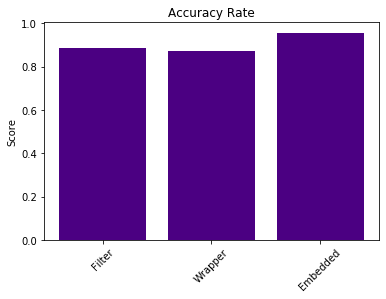

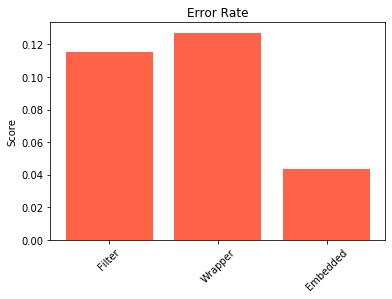

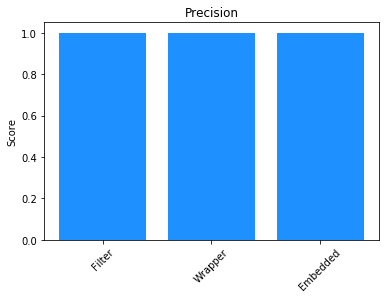

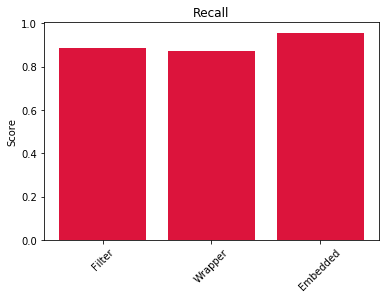

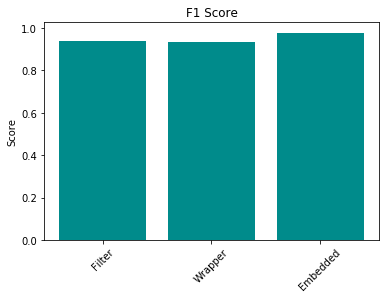

In [53]:
comparison_list = [filters,wrappers,emedded]
names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
header = ["Filter","Wrapper","Embedded"]    
#Plots of each of the Performance Values for each of the Classifiers in this analysis
for i in range(len(names)):
    x = [item[i] for item in comparison_list]
    plt.bar(header, x, color=colors[i])
    plt.xticks(rotation=45)
    plt.title(names[i])
    plt.ylabel("Score")
    plt.show()

# Summary/Conclusions:

- Out of the 128 attributes (including target column/feature), 24 columns were removed/dropped as most of the data was missing.


-  This analysis it was explored the Feature selection thru different methods:
    - For the Filter Method Selection, it was decided to use the values with an absolute correlation value higher than 0.5, which were also part of the first 20 features with the highest mi value.
    - For the Wrapper Method Selection it was used a Backward selection.
    - For the Embedded Method Selection it was used the LASSO regression model.
    

- Based on the results above it seems that the model using Features selected by the Embedded Method: LASSO is the one with better results.

- But also is important to highlight that the 3 methods provided in pretty much the same features as relevant for the model.

**As a data analyst it is important to understand the implication of selecting a particular feature as a predictor for a sensible topic as crime prevention. In this case some of the feature selection included a particular race/ethical group as a possible predictor. If that is the case I would advise myself to go deeper to understand how that variable came to form part of the data frame and explore possible biases that later can be take into account into the ML model** 